<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




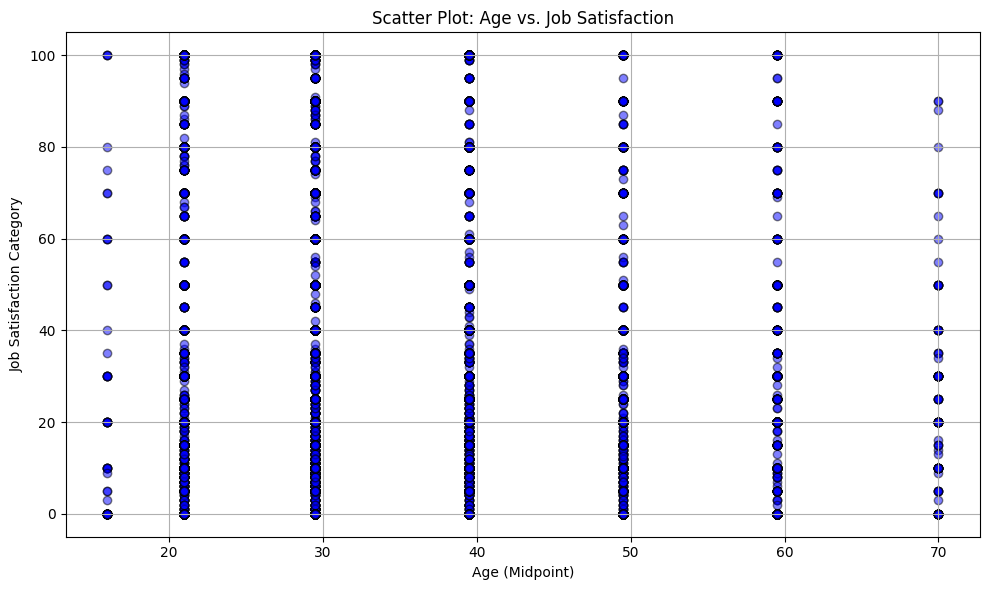

In [3]:
## Write your code here
# map age to midpoint
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeMidpoint'] = df['Age'].map(age_mapping)
# drop na
df = df.dropna(subset=['AgeMidpoint', 'JobSatPoints_6'])
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AgeMidpoint'], df['JobSatPoints_6'], alpha=0.5, color='b', edgecolors='k')
plt.title('Scatter Plot: Age vs. Job Satisfaction')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Job Satisfaction Category')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


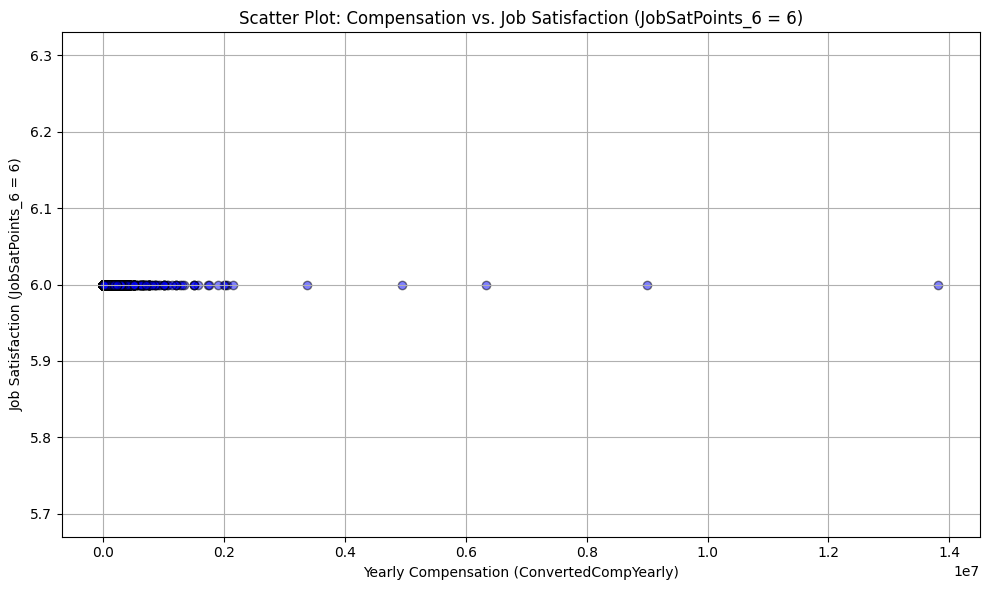

In [4]:
## Write your code here
# drop na
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], [6] * len(df), alpha=0.5, color='b', edgecolors='k')
plt.title('Scatter Plot: Compensation vs. Job Satisfaction (JobSatPoints_6 = 6)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6 = 6)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


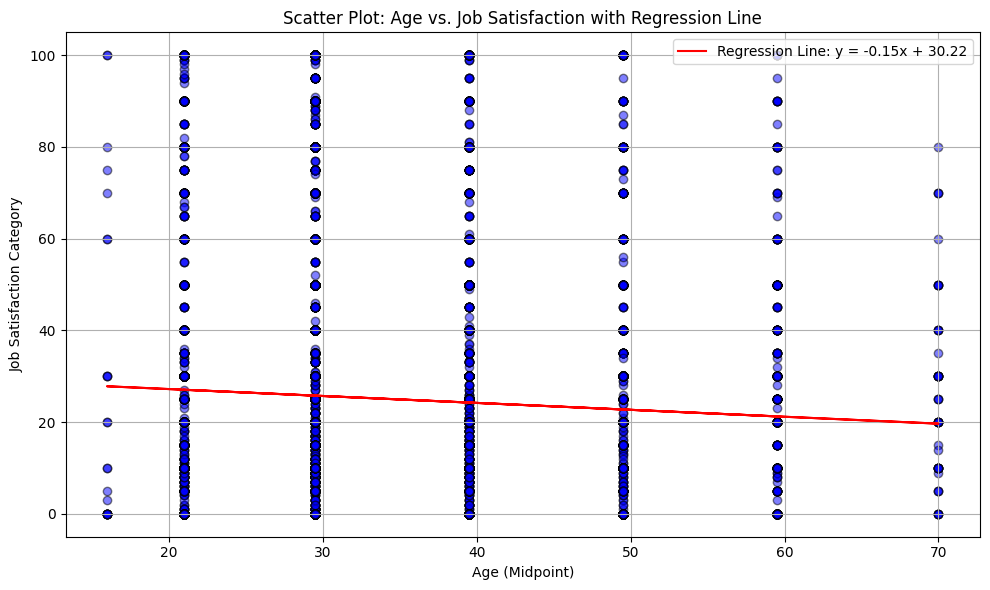

In [5]:
import numpy as np
# map age to midpoint
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeMidpoint'] = df['Age'].map(age_mapping)
# convert 'AgeMidpoint' to float for regression
df['AgeMidpoint'] = df['AgeMidpoint'].astype(float)
# drop nan
df = df.dropna(subset=['AgeMidpoint', 'JobSatPoints_6'])
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AgeMidpoint'], df['JobSatPoints_6'], alpha=0.5, color='b', edgecolors='k')
# regression line
x = df['AgeMidpoint']
y = df['JobSatPoints_6']
# slope and intercept
slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept
# plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
# plot details
plt.title('Scatter Plot: Age vs. Job Satisfaction with Regression Line')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Job Satisfaction Category')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


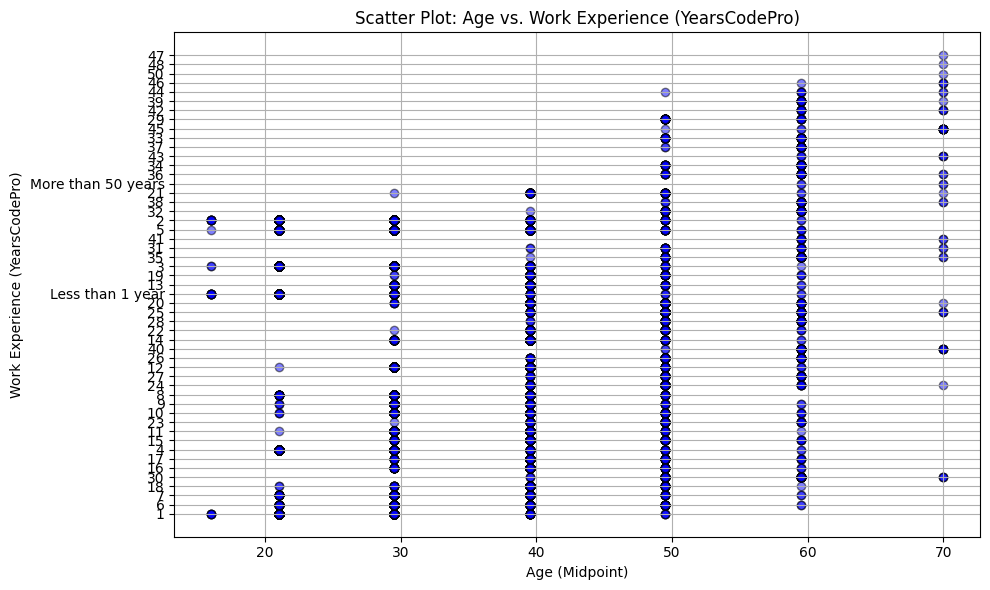

In [6]:
# define order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older']
# ensure age is categorical
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
# map and convert age categories to midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
# create a new column 'AgeMidpoint'
df['AgeMidpoint'] = df['Age'].map(age_mapping)
# drop nan
df_cleaned = df.dropna(subset=['AgeMidpoint', 'YearsCodePro'])
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AgeMidpoint'], df_cleaned['YearsCodePro'], alpha=0.5, color='b', edgecolors='k')
plt.title('Scatter Plot: Age vs. Work Experience (YearsCodePro)')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


/tmp/ipykernel_5687/2458710160.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


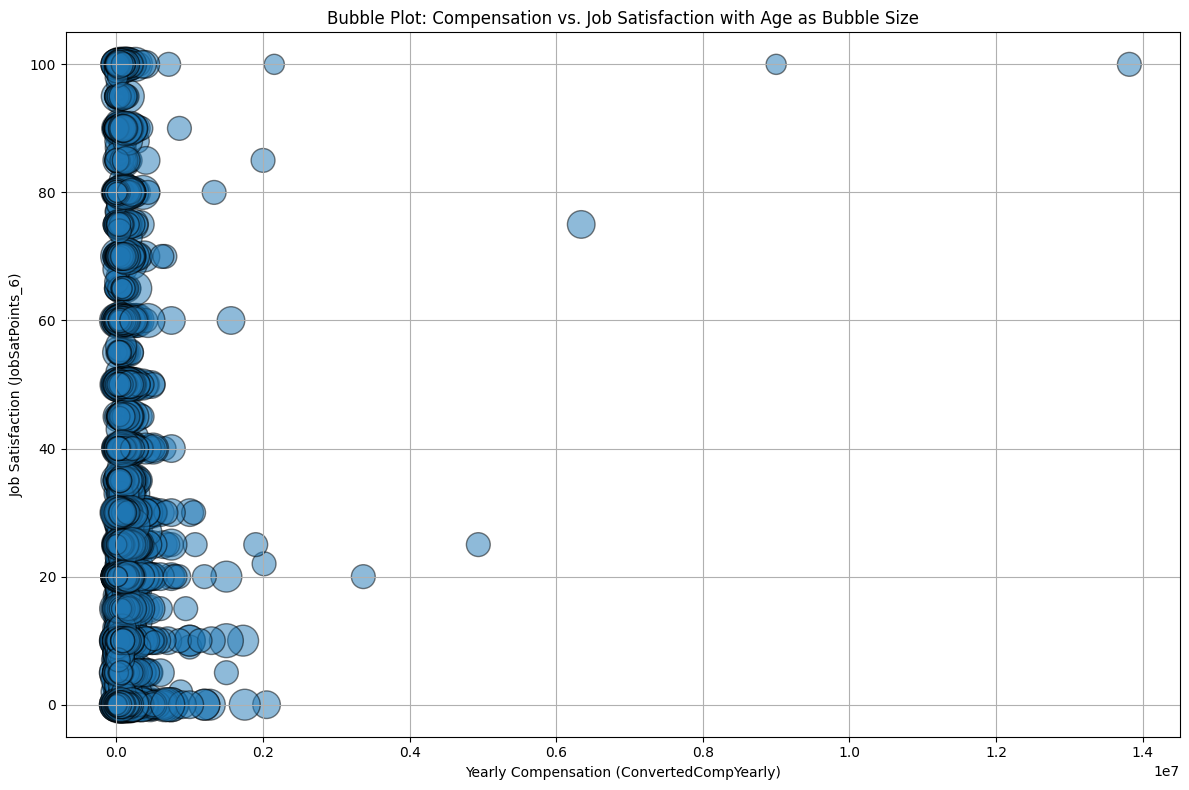

In [7]:
# map age categories to midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
# create midpoint
df['AgeMidpoint'] = df['Age'].map(age_mapping)
# convert 'AgeMidpoint' to float 
df['AgeMidpoint'] = df['AgeMidpoint'].astype(float)
# drop nan
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeMidpoint'])
# bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(
    df['ConvertedCompYearly'],  
    df['JobSatPoints_6'],       
    s=df['AgeMidpoint'] * 10,        
    alpha=0.5,                  
    cmap='viridis',             
    edgecolors='k'              
)
plt.title('Bubble Plot: Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [8]:
## Write your code here
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'AgeMidpoint'],
      dtype='object', length=115)


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_5687/3577240006.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(employment_types))
/tmp/ipykernel_5687/3577240006.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


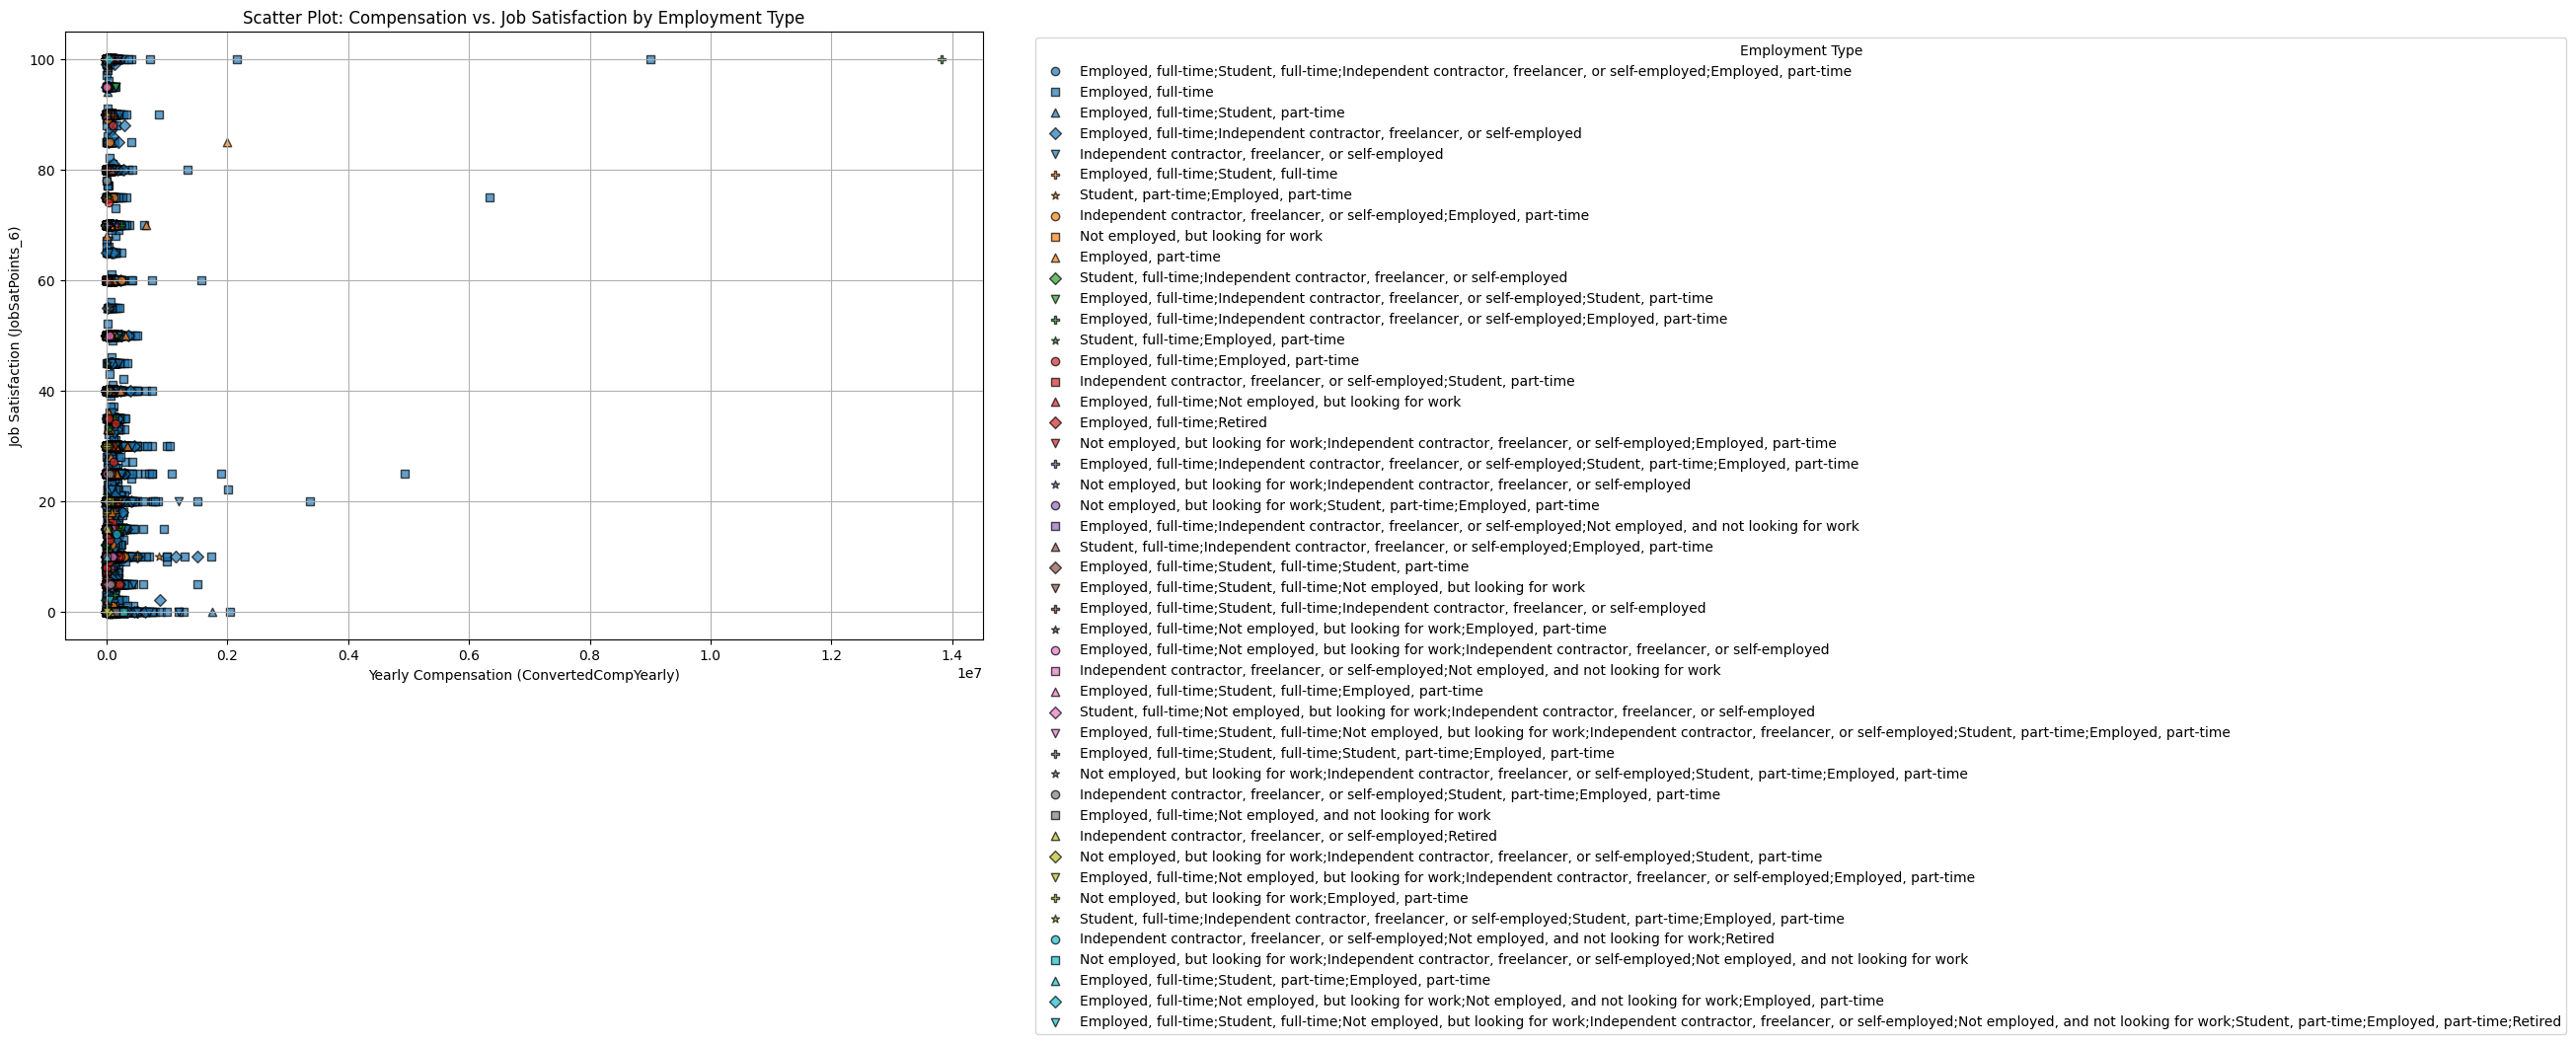

In [12]:


# Drop rows with NaN values in 'ConvertedCompYearly', 'JobSatPoints_6', or 'Employment'
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Get unique employment types
employment_types = df_cleaned['Employment'].unique()

# Set up a color map for different employment types
colors = plt.cm.get_cmap('tab10', len(employment_types))

# Set up markers for different employment types
markers = ['o', 's', '^', 'D', 'v', 'P', '*']  # Circle, square, triangle, diamond, etc.

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot data for each employment type
for i, employment in enumerate(employment_types):
    # Filter data for the specific employment type
    employment_data = df_cleaned[df_cleaned['Employment'] == employment]
    
    # Plot the scatter points for each employment type
    plt.scatter(
        employment_data['ConvertedCompYearly'],  # x-axis (Yearly Compensation)
        employment_data['JobSatPoints_6'],       # y-axis (Job Satisfaction)
        alpha=0.7,                             # Transparency for better visibility
        label=employment,                      # Label for each employment type
        color=colors(i),                       # Color based on employment type
        marker=markers[i % len(markers)],      # Marker style for each employment type
        edgecolors='k'                         # Black edges for bubbles
    )

# Title and labels
plt.title('Scatter Plot: Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')

# Show the legend to identify employment types
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show gridlines for better readability
plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_5687/3465323773.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(countries))
/tmp/ipykernel_5687/3465323773.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


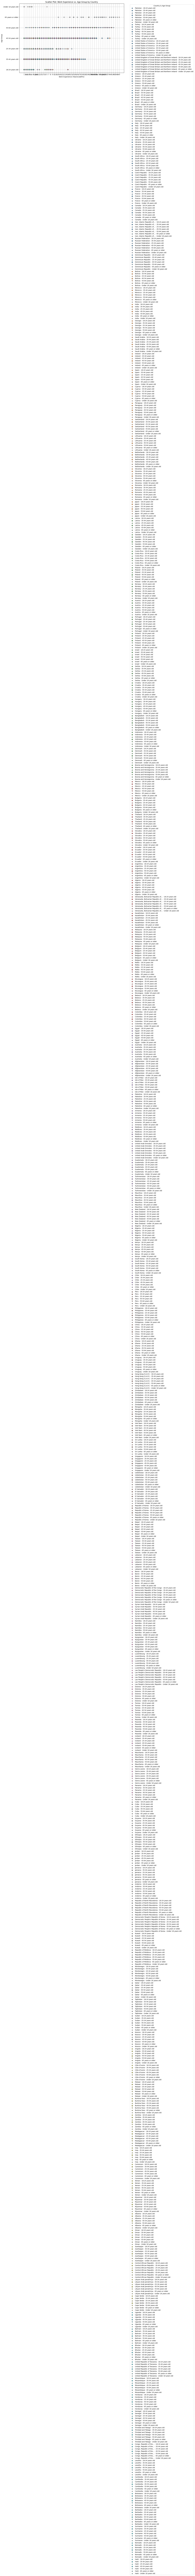

In [11]:
## Write your code here
import matplotlib.pyplot as plt
# drop nan
df_cleaned = df.dropna(subset=['YearsCodePro', 'Age', 'Country'])

# unique countries and ages
countries = df_cleaned['Country'].unique()
age_groups = df_cleaned['Age'].unique()

# color map for countries
colors = plt.cm.get_cmap('tab10', len(countries))

# Set up marker styles for different age groups
markers = ['o', 's', '^', 'D', 'v', 'P', '*']  # Circle, square, triangle, diamond, etc.

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot data for each country
for i, country in enumerate(countries):
    # Filter data for the specific country
    country_data = df_cleaned[df_cleaned['Country'] == country]
    
    # Plot each age group within the country
    for j, age_group in enumerate(age_groups):
        # Filter data for the specific age group
        age_data = country_data[country_data['Age'] == age_group]
        
        # Plot scatter points for each age group within the country
        plt.scatter(
            age_data['YearsCodePro'],  # x-axis (Work Experience)
            age_data['Age'],           # y-axis (Age Group)
            alpha=0.7,                # Transparency for better visibility
            label=f'{country} - {age_group}',  # Label combining country and age group
            color=colors(i),          # Color based on country
            marker=markers[j % len(markers)],  # Marker based on age group
            edgecolors='k'            # Black edges for bubbles
        )

# Title and labels
plt.title('Scatter Plot: Work Experience vs. Age Group by Country')
plt.xlabel('Work Experience (YearsCodePro)')
plt.ylabel('Age Group')

# Show a legend to identify the country and age group
plt.legend(title='Country & Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show gridlines for better readability
plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
